<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#matplotlib" data-toc-modified-id="matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>matplotlib</a></span><ul class="toc-item"><li><span><a href="#plt.subplots(nrows,ncols)" data-toc-modified-id="plt.subplots(nrows,ncols)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>plt.subplots(nrows,ncols)</code></a></span></li></ul></li><li><span><a href="#Scratch" data-toc-modified-id="Scratch-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scratch</a></span></li></ul></div>

**Notes**
- Guide on quick, practical chart making (doesn't go deep): [OO-API "lifecycle" tutorial](https://matplotlib.org/tutorials/introductory/lifecycle.html)

# matplotlib

In [ ]:
import matplotlib.pyplot as plt
import torch

## `plt.subplots(nrows,ncols)`

Overview:
- Returns a tuple: `(figure.Figure, axes.Axes)`
- If multiple axes are created, then they returned in an `np.array`
- The number of axes created = `nrows` × `ncols`
- `Figure` holds objects and knows how to display them
- `Axes` are the data and settings for a chart
- `figsize`'s args annoyingly correspond to (cols,rows) – they are (h,w) in ~half-inches

Mental model:
- A `Figure` is a scientific figure, possibly with multiple charts
- An `Axes` is a single chart of a figure

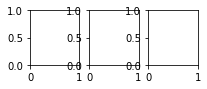

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(3,1))

Calling axes reveals that it's an array of axes.

In [ ]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

Calling the figure displays it again.

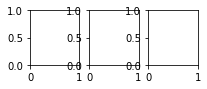

In [ ]:
fig

The `Axes.figure` parameter points to its figure.

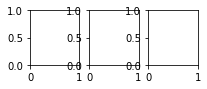

In [ ]:
ax[0].figure

**Working with Axes**

Each axes object is a separate chart. Let's `Axes.plot()` some random data.

In [ ]:
x = torch.arange(10).tolist()
y = torch.randint(10,size=(10,)).tolist()

ax[0].plot(x,y)
fig

TypeError: 'AxesSubplot' object is not subscriptable

Curiously, assigning new random numbers to y and calling plot creates a new series.

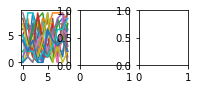

In [ ]:
for i in range(20):
    y = torch.randint(10,size=(10,)).tolist()
    ax[0].plot(x,y)
fig

Data is stored in `ax.lines` (a list) and is retrieved with `lines[idx].get_xdata()` and `lines[idx].get_ydata()`.

In [ ]:
lines = ax[0].lines
len(lines), lines[0]

(21, <matplotlib.lines.Line2D at 0x7f13d82a4b50>)

In [ ]:
x7,y7 = lines[7].get_xdata() , lines[7].get_ydata()
x7,y7

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([9, 6, 7, 8, 5, 9, 3, 2, 2, 6]))

We can clear the axes with `Axes.clear()`.

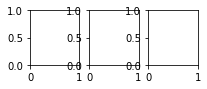

In [ ]:
ax[0].clear()
fig

In [ ]:
len(ax[0].lines)

0

Now let's change some basic parameters.

In [ ]:
# left off this section here, but ended the day below trying to set diff styles for each ax

# Scratch

In [ ]:
ax[0].dataLim
# ax.barh(x,y);
# ax.axis('off')

Bbox([[0.0, 0.0], [9.0, 8.0]])

In [ ]:
len(styles)

26

In [ ]:
x = torch.arange(10).tolist()
y = torch.randint(10,size=(10,)).tolist()

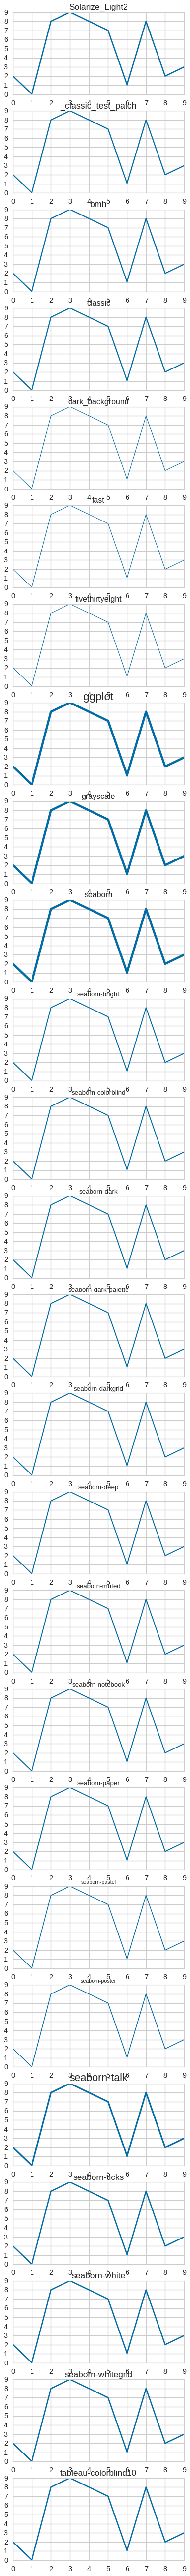

In [ ]:
###
### LEFT OFF HERE (this didn't work – style must be set for each
###                axes, but axes do not have a style param...)
###
styles = plt.style.available

fig, axs = plt.subplots(len(styles), figsize=(5,len(styles)*3))

for sty,ax in zip(styles,axs):
    ax.plot(x,y)
    ax.set(title=sty)
    plt.style.use(sty)